In [2]:
import plotly
import math
import pandas
import sklearn
import sklearn.model_selection
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.neural_network import MLPClassifier, MLPRegressor
import numpy as np
pandas.set_option('display.max_columns', None)
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn import tree
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor, NearestNeighbors, RadiusNeighborsRegressor
from sklearn.model_selection import cross_val_score
from mlxtend.regressor import StackingRegressor


In [3]:
df = pandas.read_csv("train.csv", header = 0)
df = df.drop(columns = ["Street", "Utilities", "PoolQC", "GarageYrBlt"])
# df = df.drop(columns = ["Street", "Utilities", "PoolQC", "GarageYrBlt", "MoSold", "YrSold", "YearBuilt", "YearRemodAdd"])

**Convert to one-hot**
- MSSubClass, MSZoning, Street, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, Electrical, Functional, GarageType, PavedDrive, Fence, MiscFeature, SaleType, SaleConditionc, Alley

In [4]:
cate_list =["Alley","MSSubClass", "MSZoning", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating", "Electrical", "Functional", "GarageType", "PavedDrive", "Fence", "MiscFeature", "SaleType", "SaleCondition"]

In [5]:
for c in cate_list:
    lis = []
    for i in df[c].unique():
        if(not isinstance(i, float)):
#             if(not math.isnan(i)):
            lis.append((i))
        
    # Type_key = df.groupby("Type 1").groups.keys() # take all the key values
    Type = pandas.DataFrame(columns = sorted(lis, reverse = False)) # create the new dataframe base the all the type key found
    key = list(Type.keys()) # loop over all the types
    count = 0

    for i in df[c].tolist():
        value_list = np.zeros(len(key)).reshape(1,len(key)) # default all 0
        value_list = pandas.DataFrame(value_list, columns = key)
        Type = Type.append(value_list) # append the new row into dataframe
        Type.iloc[count][(i)] = 1 # the select type feature will be 1
        count += 1 # index the current row
        
    for i in Type.keys():
        df[str(c)+str(i)] = Type[i].tolist()
df = df.drop(columns = cate_list)

**Convert to Boolean**

In [6]:
CA_list = df["CentralAir"].tolist()
CA_Convert_list = []
for i in CA_list:
    if(i == "N"):
        CA_Convert_list.append(0)
    else:
        CA_Convert_list.append(1)
df["CentralAir_New"] = CA_Convert_list
df = df.drop(columns = ["CentralAir"])

**Convert to Rank**

- LotShape, LandContour, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, FireplaceQu, GarageFinish, GarageQual, GarageCond, PoolQC

- OverallQual, OverallCond

In [7]:
LotShape_Convert_list = []
for i in df["LotShape"].tolist():
    if(i == "Reg"):
        LotShape_Convert_list.append(3)
    elif(i == "IR1"):
        LotShape_Convert_list.append(2)
    elif(i == "IR2"):
        LotShape_Convert_list.append(1)
    elif(i == "IR3"):
        LotShape_Convert_list.append(0)
df["LotShape_New"] = LotShape_Convert_list
df = df.drop(columns = ["LotShape"])

In [8]:
LandContour_Convert_list = []
for i in df["LandContour"].tolist():
    if(i == "Lvl"):
        LandContour_Convert_list.append(3)
    elif(i == "Bnk"):
        LandContour_Convert_list.append(2)
    elif(i == "HLS"):
        LandContour_Convert_list.append(1)
    elif(i == "Low"):
        LandContour_Convert_list.append(0)
df["LandContour_New"] = LandContour_Convert_list
df = df.drop(columns = ["LandContour"])

In [9]:
for k in ["ExterCond", "ExterQual", "HeatingQC", "KitchenQual"]:
    ExterQual_Convert_list = []
    for i in df[k].tolist():
        if(i == "Ex"):
            ExterQual_Convert_list.append(4)
        elif(i == "Gd"):
            ExterQual_Convert_list.append(3)
        elif(i == "TA"):
            ExterQual_Convert_list.append(2)
        elif(i == "Fa"):
            ExterQual_Convert_list.append(1)
        elif(i == "Po"):
            ExterQual_Convert_list.append(0)
    df[str(k)+"_New"] = ExterQual_Convert_list
    df = df.drop(columns = [k])

In [10]:
for k in ["BsmtExposure"]:
    ExterQual_Convert_list = []
    for i in df[k].tolist():
        if(not isinstance(i, float)):
            if(i == "Gd"):
                ExterQual_Convert_list.append(4)
            elif(i == "Av"):
                ExterQual_Convert_list.append(3)
            elif(i == "Mn"):
                ExterQual_Convert_list.append(2)
            elif(i == "No"):
                ExterQual_Convert_list.append(1)
        else:
            ExterQual_Convert_list.append(0)


    df[str(k)+"_New"] = ExterQual_Convert_list
    df = df.drop(columns = [k])

In [11]:
for k in ["BsmtCond", "BsmtQual", "FireplaceQu", "GarageQual", "GarageCond"]:
    BsmtQual_Convert_list = []
    for i in df[k].tolist():
        if(not isinstance(i, float)):
            if(i == "Ex"):
                BsmtQual_Convert_list.append(5)
            elif(i == "Gd"):
                BsmtQual_Convert_list.append(4)
            elif(i == "TA"):
                BsmtQual_Convert_list.append(3)
            elif(i == "Fa"):
                BsmtQual_Convert_list.append(2)
            elif(i == "Po"):
                BsmtQual_Convert_list.append(1)
            elif(i == "NA"):
                BsmtQual_Convert_list.append(0)
        else:
            BsmtQual_Convert_list.append(0)


    df[str(k)+"_New"] = BsmtQual_Convert_list
    df = df.drop(columns = [k])

In [12]:
for k in ["BsmtFinType1", "BsmtFinType2"]:
    BsmtQual_Convert_list = []
    for i in df[k].tolist():
        if(not isinstance(i, float)):
            if(i == "GLQ"):
                BsmtQual_Convert_list.append(6)
            elif(i == "ALQ"):
                BsmtQual_Convert_list.append(5)
            elif(i == "Rec"):
                BsmtQual_Convert_list.append(4)
            elif(i == "BLQ"):
                BsmtQual_Convert_list.append(3)
            elif(i == "LwQ"):
                BsmtQual_Convert_list.append(2)
            elif(i == "Unf"):
                BsmtQual_Convert_list.append(1)
            elif(i == "NA"):
                BsmtQual_Convert_list.append(0)
        else:
            BsmtQual_Convert_list.append(0)


    df[str(k)+"_New"] = BsmtQual_Convert_list
    df = df.drop(columns = [k])


In [13]:
for k in ["GarageFinish"]:
    BsmtQual_Convert_list = []
    for i in df[k].tolist():
        if(not isinstance(i, float)):
            if(i == "Fin"):
                BsmtQual_Convert_list.append(3)
            elif(i == "RFn"):
                BsmtQual_Convert_list.append(2)
            elif(i == "Unf"):
                BsmtQual_Convert_list.append(1)
            elif(i == "NA"):
                BsmtQual_Convert_list.append(0)
        else:
            BsmtQual_Convert_list.append(0)
df[str(k)+"_New"] = BsmtQual_Convert_list
df = df.drop(columns = [k])

In [14]:
# replace nan to 0
df["LotFrontage"] = df["LotFrontage"].fillna(0).tolist()
df["MasVnrArea"] = df["MasVnrArea"].fillna(0).tolist()
df = df.drop(columns = ["Id"])


In [15]:
scale_df = df.drop(columns = ["SalePrice"])
keys = list(scale_df.keys())

scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(0, 1))
scaler.fit(scale_df)
scale_df = scaler.transform(scale_df)
scale_df = pandas.DataFrame(scale_df, columns = keys)
scale_df["SalePrice"] = df["SalePrice"].tolist()


In [16]:
df = scale_df

**PCA**

In [203]:
candidate_components = range(10, 240, 30)
explained_ratios = []
for c in candidate_components:
    pca = PCA(n_components=c)
    X_pca = pca.fit_transform(df.drop(columns = ["SalePrice"]))
    explained_ratios.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.plot(candidate_components, explained_ratios)
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained variance ratio for PCA')
plt.yticks(np.arange(0.5, 1.05, .05))
plt.xticks(np.arange(0, 300, 20))

In [ ]:
Y = df["SalePrice"].tolist()
X = df.drop(columns = ["SalePrice"]).values.tolist()
pca = sklearn.decomposition.PCA(n_components=100)
pca.fit(X)
X = pca.transform(X)


In [ ]:
X.shape

**Dataset**

In [17]:
dataset = shuffle(df)
Test = dataset[:100]
Train = dataset[100:]

Test_X = Test.drop(columns = "SalePrice").values.tolist()
Test_Y = Test["SalePrice"].tolist()

Train_X = Train.drop(columns = "SalePrice").values.tolist()
Train_Y = Train["SalePrice"].tolist()

In [206]:
# FOR PCA
Test = X[:100]
Train = X[100:]

Test_X = Test
Test_Y = Y[:100]

Train_X = Train
Train_Y = Y[100:]

**Model Neural Network**

In [18]:
NN = MLPRegressor(solver='adam',  # weight optimization
                    activation='relu',  # activation function
                    alpha=1e-4, # Regularizer value
                    learning_rate_init = 0.1,
                    hidden_layer_sizes=(30,20,5), # layer and node (node,node) --> numbers of layers
                    random_state=1, #random state
                    max_iter = 1000, # max iteration
                    early_stopping = True) # early stop

NN.fit(Train_X, Train_Y) # fit the neural network
# scores = sklearn.model_selection.cross_val_score(clf, Train_X, Train_Y, cv=5)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(30, 20, 5), learning_rate='constant',
             learning_rate_init=0.1, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [19]:
NN.score(Train_X, Train_Y)

0.850444012859298

In [20]:
NN.score(Test_X, Test_Y)

0.8646539652939497

In [202]:
# NN.validation_scores_ # optimisation history

**Elastic Net**

In [21]:
Net = ElasticNet(random_state=0, warm_start = True)
Net.fit(Train_X, Train_Y)  

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=0, selection='cyclic', tol=0.0001, warm_start=True)

In [22]:
Net.score(Train_X,Train_Y)

0.6078136802722819

In [23]:
Net.score(Test_X,Test_Y)

0.7125329001120964

**Decision Tree**

In [24]:
Tree = tree.DecisionTreeRegressor()
Tree.fit(Train_X, Train_Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [25]:
Tree.score(Train_X,Train_Y)

1.0

In [26]:
Tree.score(Test_X,Test_Y)

0.7505937462001365

**Bayesian Ridge**

In [27]:
BR = linear_model.BayesianRidge()
BR.fit(Train_X, Train_Y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [28]:
BR.score(Train_X, Train_Y)

0.9048648196311421

In [29]:
BR.score(Test_X, Test_Y)

0.9067546455773876

**KNR**

In [250]:
len(Train_Y)

1360

In [30]:
n = 100
highest = 0
node = 0
for i in range(1,100):
    neigh = KNeighborsRegressor(n_neighbors = i, algorithm = "auto", weights = "distance") #n_neighbors=2
    neigh.fit(Train_X, Train_Y) 
#     curr_score = neigh.score(Train_X[:n], Train_Y[:n])
    curr_score = neigh.score(Test_X, Test_Y)
    if(highest < curr_score):
        highest = curr_score
        node = i

In [31]:
node, highest

(10, 0.7536954182183254)

In [35]:
neigh = KNeighborsRegressor(n_neighbors = node, algorithm = "auto", weights = "distance") #n_neighbors=2
neigh.fit(Train_X, Train_Y) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='distance')

In [36]:
neigh.score(Test_X, Test_Y)

0.7536954182183254

In [293]:
cross = cross_val_score(neigh, Train_X, Train_Y,cv=5)

In [295]:
cross

array([0.74341052, 0.72996803, 0.69683924, 0.71016358, 0.6603024 ])

In [294]:
cross.score(Train_X, Train_Y)

AttributeError: 'numpy.ndarray' object has no attribute 'score'

In [285]:
neigh.score(Test_X, Test_Y)

0.6133136762227651

**SVR**

In [37]:
# svr_poly = SVR(kernel='rbf', C=1e7, gamma='auto',  epsilon=.1, coef0=1)
# svr_poly = SVR(kernel='poly', C=1e7, gamma='auto', degree=3, epsilon=.1, coef0=1)
svr_poly = SVR(kernel='poly', C=1e7, gamma='auto', degree=3, epsilon=.1, coef0=1)




In [38]:
svr_poly.fit(Train_X, Train_Y)

SVR(C=10000000.0, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [39]:
svr_poly.score(Train_X,Train_Y)

0.9537141258845151

In [40]:
svr_poly.score(Test_X,Test_Y)

0.9021621457721507

**Ensemble Learning - Voting**

In [41]:
ereg = sklearn.ensemble.VotingRegressor(estimators=[('Neural Network', NN), ('Elastic Net', Net), ("Tree", Tree), ("SVR", svr_poly)])
ereg.fit(Train_X, Train_Y)

VotingRegressor(estimators=[('Neural Network',
                             MLPRegressor(activation='relu', alpha=0.0001,
                                          batch_size='auto', beta_1=0.9,
                                          beta_2=0.999, early_stopping=True,
                                          epsilon=1e-08,
                                          hidden_layer_sizes=(30, 20, 5),
                                          learning_rate='constant',
                                          learning_rate_init=0.1, max_iter=1000,
                                          momentum=0.9, n_iter_no_change=10,
                                          nesterovs_momentum=True, power_t=0.5,
                                          random_state=1, shuffle=Tr...
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split

In [42]:
ereg.score(Train_X, Train_Y) # Training score

0.9264556878263173

In [43]:
ereg.score(Test_X, Test_Y) # Testing Score

0.9118873722438643

**Ensemble Learning - Stacking**

In [48]:
meta = MLPRegressor() # early stop

In [56]:
stregr = StackingRegressor(regressors=[NN, Net, svr_poly, BR], 
                           meta_regressor=meta)

# Training the stacking classifier

stregr.fit(Train_X, Train_Y)


StackingRegressor(meta_regressor=MLPRegressor(activation='relu', alpha=0.0001,
                                              batch_size='auto', beta_1=0.9,
                                              beta_2=0.999,
                                              early_stopping=False,
                                              epsilon=1e-08,
                                              hidden_layer_sizes=(100,),
                                              learning_rate='constant',
                                              learning_rate_init=0.001,
                                              max_iter=200, momentum=0.9,
                                              n_iter_no_change=10,
                                              nesterovs_momentum=True,
                                              power_t=0.5, random_state=None,
                                              shuffle=True, solver=...
                                  degree=3, epsilon=0.1, gamma='auto',
      

In [57]:
stregr.score(Train_X, Train_Y)

0.9604970228931329

In [58]:
stregr.score(Test_X, Test_Y)

0.9069478835265848

In [ ]:
# Evaluate and visualize the fit
print("Mean Squared Error: %.4f"
      % np.mean((stregr.predict(X) - y) ** 2))
print('Variance Score: %.4f' % stregr.score(X, y))


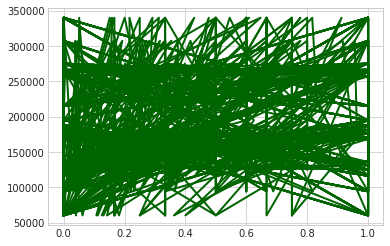

In [59]:
with plt.style.context(('seaborn-whitegrid')):
#     plt.scatter(X, y, c='lightgray')
    plt.plot(Train_X[:20], stregr.predict(Train_X[:20]), c='darkgreen', lw=2)

plt.show()

In [44]:
xt = Test_X[:20]
ereg.score(xt, Test_Y[:20])

0.7956411862202194

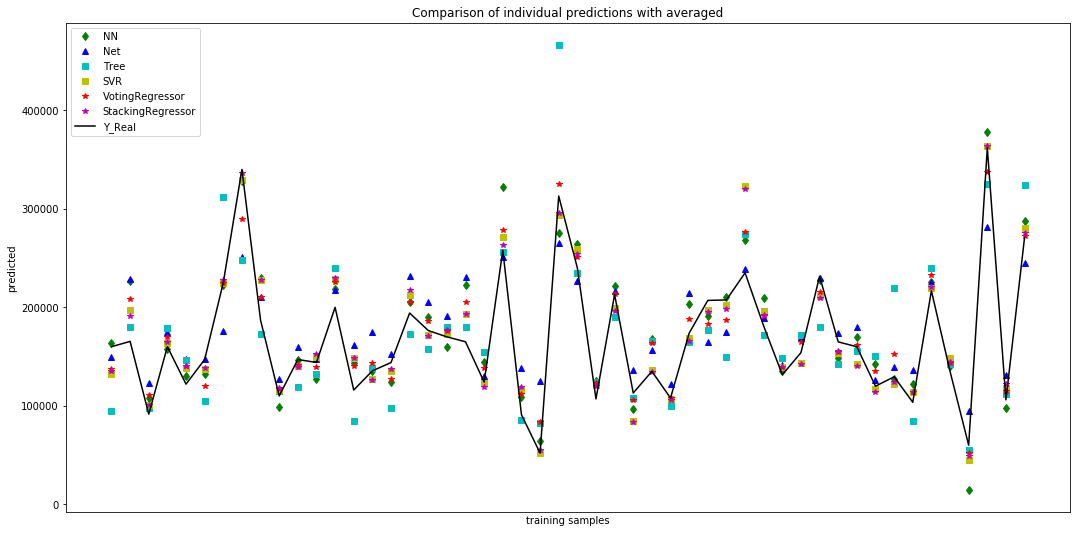

In [61]:

num = 50
xt = Test_X[:num]


plt.figure(figsize=(18,9))
plt.plot(NN.predict(xt), 'gd', label='NN')
plt.plot(Net.predict(xt), 'b^', label='Net')
plt.plot(Tree.predict(xt), 'cs', label='Tree')
plt.plot(svr_poly.predict(xt), 'ys', label='SVR')
plt.plot(ereg.predict(xt), 'r*', label='VotingRegressor')
plt.plot(stregr.predict(xt), 'm*', label='StackingRegressor')


plt.plot(Test_Y[:num], 'black', label='Y_Real')


plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()

In [ ]:
clf.predict(df_test) # Testing Score

In [ ]:
clf.validation_scores_ # optimisation history

In [ ]:
clf.loss_curve_ # loss function history

In [ ]:
Train_X

In [ ]:
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
clf = SVR(kernel='poly', C=100, gamma='auto', degree=2, epsilon=.1,
               coef0=1)
clf.fit(X, y) 
clf.score(X,y)

In [ ]:
X